# Jonathan Halverson
# Thursday, October 18, 2017
# Boston housing data

In [1]:
import sklearn.datasets

In [2]:
data = sklearn.datasets.load_boston()

In [3]:
print(data['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


We see that there is no missing data and all features are double precision.

In [67]:
corr_mat = df.corr().applymap(lambda u: round(u, 2))
corr_mat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.40,-0.06,0.42,-0.22,0.35,-0.38,0.62,0.58,0.29,-0.38,0.45,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.40,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.62,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


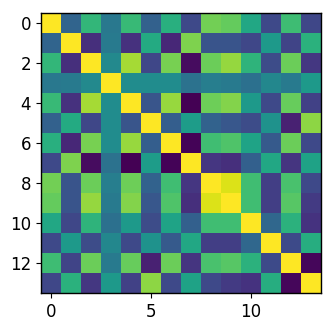

In [68]:
plt.imshow(corr_mat)

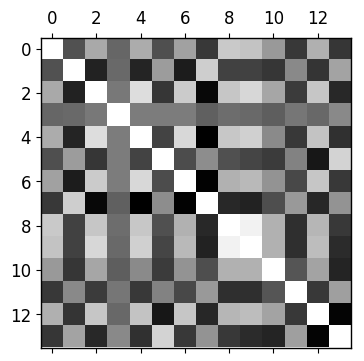

In [69]:
plt.matshow(corr_mat, cmap=plt.cm.gray)
#plt.axes().set_xticklabels(corr_mat.index)

In [70]:
def notable_pairs(cm, thres=0.5):
     dims = cm.shape[0]
     trips = []
     for i in range(dims - 1):
          for j in range(i + 1, dims):
               trips.append((cm.index[i], cm.columns[j], cm.iloc[i, j]))
     trips.sort(cmp=lambda u, v: cmp(abs(u[2]), abs(v[2])), reverse=True)
     for trip in trips:
          if abs(trip[2]) >= thres: print trip[0], trip[1], round(trip[2], 2)

In [71]:
notable_pairs(corr_mat)

RAD TAX 0.91
NOX DIS -0.77
INDUS NOX 0.76
AGE DIS -0.75
LSTAT MEDV -0.74
NOX AGE 0.73
INDUS TAX 0.72
INDUS DIS -0.71
RM MEDV 0.7
NOX TAX 0.67
ZN DIS 0.66
INDUS AGE 0.64
CRIM RAD 0.62
NOX RAD 0.61
RM LSTAT -0.61
INDUS RAD 0.6
INDUS LSTAT 0.6
AGE LSTAT 0.6
NOX LSTAT 0.59
CRIM TAX 0.58
ZN AGE -0.57
TAX LSTAT 0.54
ZN INDUS -0.53
DIS TAX -0.53
ZN NOX -0.52
AGE TAX 0.51
PTRATIO MEDV -0.51
DIS LSTAT -0.5


In [8]:
df.corr()['MEDV'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.385832
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

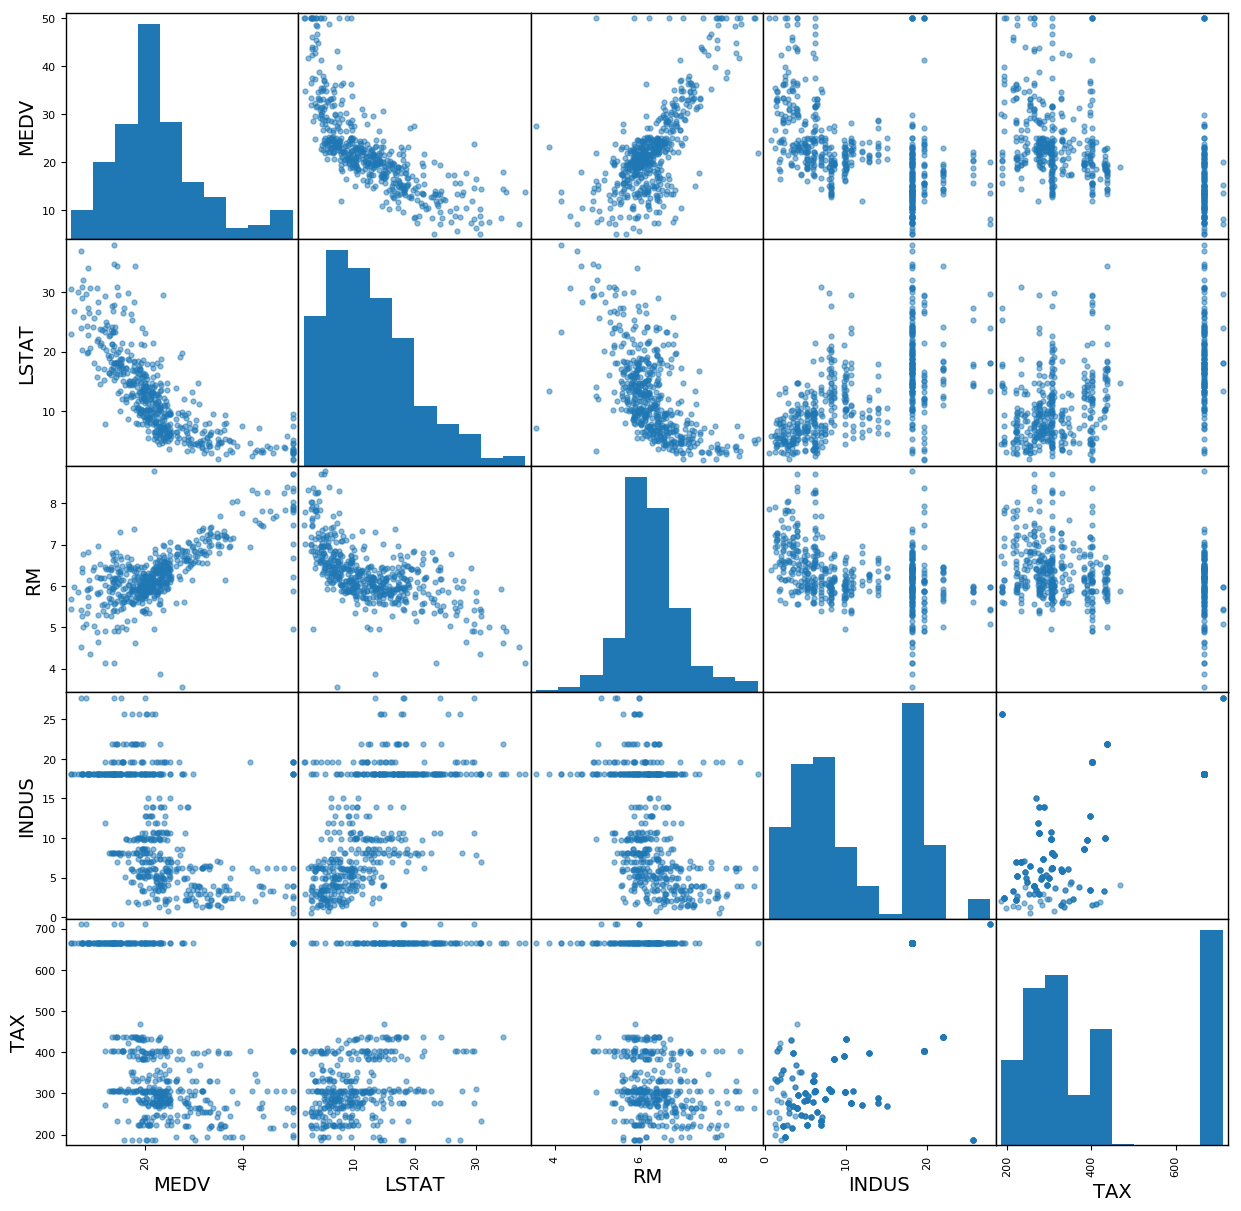

In [10]:
from pandas.tools.plotting import scatter_matrix

atts = ['MEDV', 'LSTAT', 'RM', 'INDUS', 'TAX']
_ = scatter_matrix(df[atts], figsize=(15, 15))

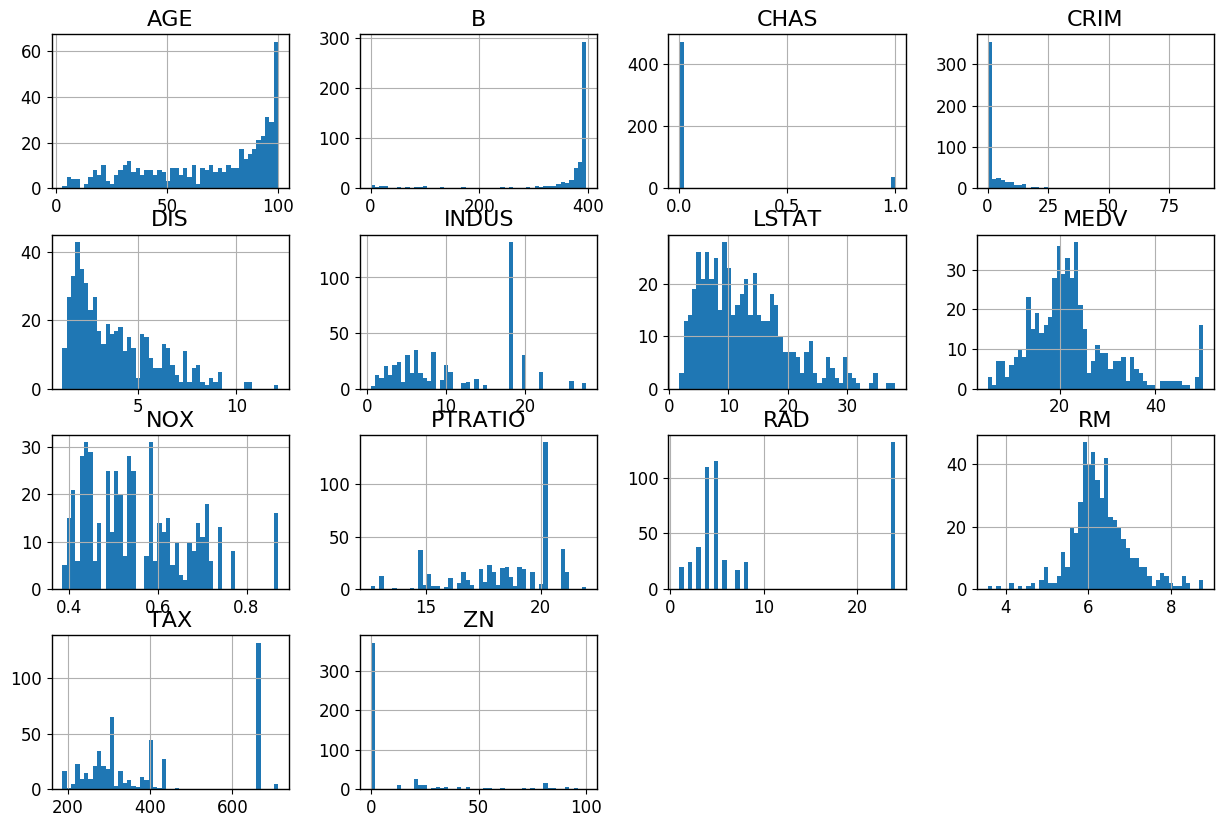

In [11]:
_ = df.hist(bins=50, figsize=(15, 10))

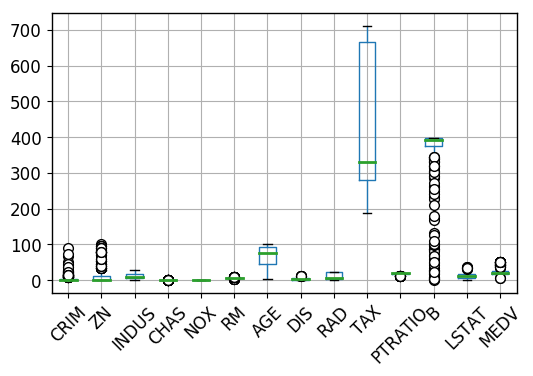

In [16]:
df.boxplot(figsize=(9, 5), rot=45)

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1].values, df.MEDV.values, test_size=0.3, random_state=0)

In [80]:
idx_lstat = df.columns.values.tolist().index('LSTAT')
idx_rm = df.columns.values.tolist().index('RM')
idx_dis = df.columns.values.tolist().index('DIS')

In [81]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributesAdder(BaseEstimator, TransformerMixin):
     def __init__(self, add_atts=False): # no *args or **kargs
          self.add_atts = add_atts
     def fit(self, X, y=None):
          return self
     def transform(self, X, y=None):
          if self.add_atts:
               lstat_sqrt = np.sqrt(X[:, idx_lstat])
               rm_to_dis = X[:, idx_rm] / X[:, idx_dis]
               return np.c_[X, lstat_sqrt, rm_to_dis]
          else:
               return X

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

### Linear regression

In [85]:
pline = Pipeline([('add_atts', AttributesAdder()), ('std_sc', StandardScaler()), ('lin_reg', LinearRegression())])
param_grid = {'add_atts__add_atts':[False, True]}
grid_search = GridSearchCV(pline, param_grid, cv=5, scoring='neg_mean_squared_error', refit=True)
grid_search.fit(X_train, y_train)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
print 'Train:', mean_squared_error(y_train, y_train_pred), r2_score(y_train, y_train_pred)
print 'Test:', mean_squared_error(y_test, y_test_pred), r2_score(y_test, y_test_pred)

Train: 14.2394801016 0.832011303803
Test: 23.8190794394 0.713938198067


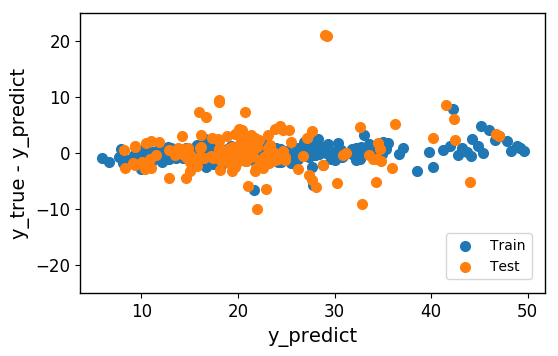

In [106]:
plt.scatter(y_train_pred, y_train - y_train_pred, label='Train')
plt.scatter(y_test_pred, y_test - y_test_pred, label='Test')
plt.plot([5, 50], [0, 0], 'k-', lw=2)
plt.ylim(-25, 25)
plt.xlabel('y_predict')
plt.ylabel('y_true - y_predict')
plt.legend(loc='lower right')

In [ ]:
from sklearn.model_selection import cross_val_predict

pline = Pipeline([('add_atts', AttributesAdder()), ('std_sc', StandardScaler()), ('lin_reg', LinearRegression())])
param_grid = {'add_atts__add_atts':[False, True]}
grid_search = GridSearchCV(pline, param_grid, cv=5, scoring='neg_mean_squared_error', refit=True)
grid_search.fit(X_train, y_train)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
print 'Train:', mean_squared_error(y_train, y_train_pred), r2_score(y_train, y_train_pred)
print 'Test:', mean_squared_error(y_test, y_test_pred), r2_score(y_test, y_test_pred)

### Ridge regression

In [86]:
from sklearn.linear_model import Ridge

In [90]:
pline = Pipeline([('add_atts', AttributesAdder()), ('std_sc', StandardScaler()), ('rid_reg', Ridge())])
param_grid = {'add_atts__add_atts':[False, True], 'rid_reg__alpha':np.logspace(-2, 2, num=20)}
grid_search = GridSearchCV(pline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train).score(X_test, y_test)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
print 'Train:', mean_squared_error(y_train, y_train_pred), r2_score(y_train, y_train_pred)
print 'Test:', mean_squared_error(y_test, y_test_pred), r2_score(y_test, y_test_pred)
print 'Just a check:', -grid_search.fit(X_train, y_train).score(X_test, y_test)

Train: 14.2617624526 0.831748430224
Test: 23.5173868104 0.717561458877
Just a check: -23.5173868104


In [91]:
grid_search.best_params_

{'add_atts__add_atts': True, 'rid_reg__alpha': 0.29763514416313175}

We see that adding regularization has little effect.

### Linear regression with polynomial features

In [120]:
from sklearn.preprocessing import PolynomialFeatures

In [122]:
pline = Pipeline([('add_atts', AttributesAdder()),
                  ('pf', PolynomialFeatures(degree=3)),
                  ('std_sc', StandardScaler()),
                  ('lin_reg', LinearRegression())])
param_grid = {'add_atts__add_atts':[False, True]}
grid_search = GridSearchCV(pline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
print 'Train:', mean_squared_error(y_train, y_train_pred), r2_score(y_train, y_train_pred)
print 'Test:', mean_squared_error(y_test, y_test_pred), r2_score(y_test, y_test_pred)

Train: 5.52180638697e-24 1.0
Test: 2033.27181206 -23.4191384415


In [123]:
X_train.shape

(354, 13)

In [125]:
pf = PolynomialFeatures(degree=3)
pf.fit_transform(X_train).shape

(354, 560)

Look at how many features are newly created. Such a large number of features leads to a nearly perfect fit for the training data but a terrible fit for the test.

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
pline = Pipeline([('add_atts', AttributesAdder()), ('std_sc', StandardScaler()), ('rf', RandomForestRegressor())])
param_grid = {'add_atts__add_atts':[False, True], 'rf__n_estimators':[50, 100, 250]}
grid_search = GridSearchCV(pline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
print 'Train:', mean_squared_error(y_train, y_train_pred), r2_score(y_train, y_train_pred)
print 'Test:', mean_squared_error(y_test, y_test_pred), r2_score(y_test, y_test_pred)

Train: 1.39342248588 0.983561251887
Test: 15.2739341842 0.816563476079


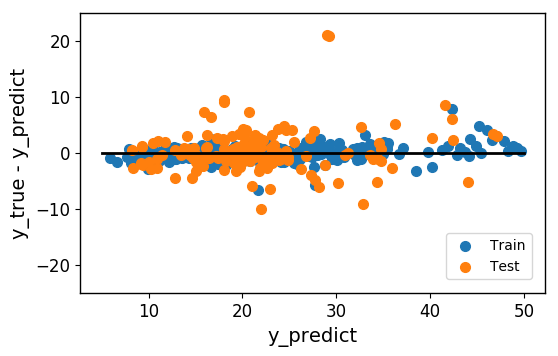

In [109]:
plt.scatter(y_train_pred, y_train - y_train_pred, label='Train')
plt.scatter(y_test_pred, y_test - y_test_pred, label='Test')
plt.plot([5, 50], [0, 0], 'k-', lw=2)
plt.ylim(-25, 25)
plt.xlabel('y_predict')
plt.ylabel('y_true - y_predict')
plt.legend(loc='lower right')

### Linear SVR

In [110]:
from sklearn.svm import LinearSVR

In [112]:
pline = Pipeline([('add_atts', AttributesAdder()), ('std_sc', StandardScaler()), ('lsvr', LinearSVR())])
param_grid = {'add_atts__add_atts':[False, True], 'lsvr__epsilon':np.logspace(-2, 1, num=10), 'lsvr__C':np.logspace(-1, 3, num=10)}
grid_search = GridSearchCV(pline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
print 'Train:', mean_squared_error(y_train, y_train_pred), r2_score(y_train, y_train_pred)
print 'Test:', mean_squared_error(y_test, y_test_pred), r2_score(y_test, y_test_pred)

Train: 15.7915560837 0.813700858564
Test: 28.2590874911 0.660614697168


In [113]:
grid_search.best_params_

{'add_atts__add_atts': True,
 'lsvr__C': 46.415888336127772,
 'lsvr__epsilon': 2.154434690031882}

### SVR

In [115]:
from sklearn.svm import SVR

pline = Pipeline([('add_atts', AttributesAdder()), ('std_sc', StandardScaler()), ('svr', SVR(kernel='rbf'))])
param_grid = {'add_atts__add_atts':[False, True], 'svr__epsilon':np.logspace(-3, 0, num=10), 'svr__gamma':np.logspace(-2, 2, num=10), 'svr__C':np.logspace(-1, 3, num=10)}
grid_search = GridSearchCV(pline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
print 'Train:', mean_squared_error(y_train, y_train_pred), r2_score(y_train, y_train_pred)
print 'Test:', mean_squared_error(y_test, y_test_pred), r2_score(y_test, y_test_pred)

In [25]:
grid_search.best_params_

{'add_atts__add_atts': True,
 'svr__C': 100.0,
 'svr__epsilon': 1.0,
 'svr__gamma': 0.077426368268112694}

### SVR with PCA

In [26]:
from sklearn.decomposition import PCA

pline = Pipeline([('add_atts', AttributesAdder()),
                  ('std_sc', StandardScaler()),
                  ('pca', PCA(n_components=0.9)),
                  ('svr', SVR(kernel='rbf'))])
param_grid = {'add_atts__add_atts':[False, True], 'svr__epsilon':np.logspace(-3, -1, num=5), 'svr__gamma':np.logspace(1, 3, num=5), 'svr__C':np.logspace(1, 3, num=5)}
grid_search = GridSearchCV(pline, param_grid, cv=5, refit=True, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
print 'Train:', mean_squared_error(y_train, y_train_pred), r2_score(y_train, y_train_pred)
print 'Test:', mean_squared_error(y_test, y_test_pred), r2_score(y_test, y_test_pred)

-11.494544368962433

### SVR with LLE

In [128]:
from sklearn.manifold import LocallyLinearEmbedding

pline = Pipeline([('std_sc', StandardScaler()),
                  ('lle', LocallyLinearEmbedding(n_neighbors=10, n_components=7)),
                  ('svr', SVR(kernel='rbf'))])
param_grid = {'svr__epsilon':np.logspace(-3, -1, num=5), 'svr__gamma':np.logspace(1, 3, num=5), 'svr__C':np.logspace(1, 3, num=5)}
grid_search = GridSearchCV(pline, param_grid, cv=5, refit=True, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
print 'Train:', mean_squared_error(y_train, y_train_pred), r2_score(y_train, y_train_pred)
print 'Test:', mean_squared_error(y_test, y_test_pred), r2_score(y_test, y_test_pred)

Train: 13.9265316898 0.83570327818
Test: 37.9806251505 0.543861210222


In [129]:
grid_search.best_params_

{'svr__C': 316.22776601683796,
 'svr__epsilon': 0.0031622776601683794,
 'svr__gamma': 316.22776601683796}